# Training logistic Regression classifier


In [ ]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd

voc = bv.get_vocabulary(path='../dataset/', numWords=1000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)

learning_rates = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]
validation_accuracy = []
train_accuracy = []


for lr in learning_rates:
    w, b = pvml.logreg_train(
        X_train, Y_train, lambda_=0.00001, lr=lr, steps=1000, init_w=None, init_b=0)

    P = pvml.logreg_inference(X_train, w, b)
    prediction = (P > 0.5)
    accuracy_train = (prediction == Y_train).mean()

    P = pvml.logreg_inference(X_valid, w, b)
    prediction = (P > 0.5)
    accuracy_validation = (prediction == Y_valid).mean()

    print('Lambda: ', lr)
    print('Accuracy: ', accuracy_train*100)

    validation_accuracy.append(accuracy_validation*100)
    train_accuracy.append(accuracy_train*100)

results = pd.DataFrame({'Learning rates': learning_rates,
                       'Validation accuracy': validation_accuracy,'Train accuracy': train_accuracy})
results.to_csv('../data/logistic_diff_lr.csv')

<Axes: title={'center': 'Comparison of different learning rates'}, xlabel='Learning rates', ylabel='Accuracy (%)'>

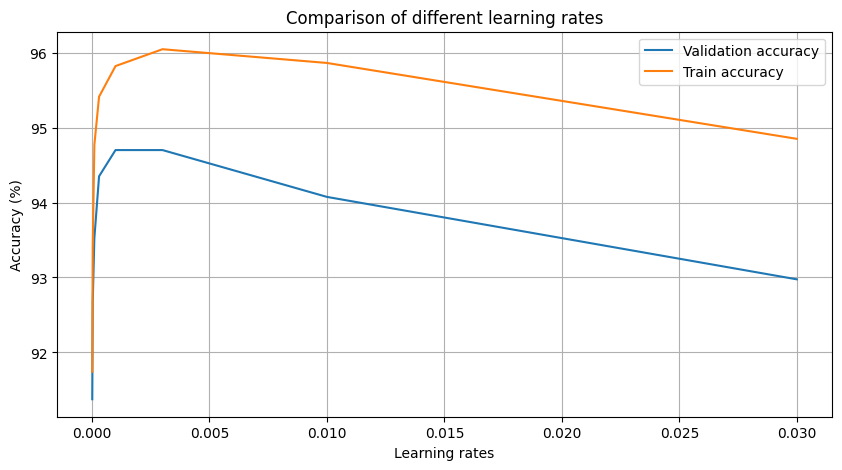

In [11]:
import pandas as pd

data = pd.read_csv('../data/logistic_diff_lr.csv')
data.plot(kind='line', x='Learning rates', y=['Validation accuracy','Train accuracy'], figsize=(10, 5), grid=True,
          title='Comparison of different learning rates', ylabel='Accuracy (%)')

# Comparing different vocabulary size


In [ ]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd

validation_accuracy = []
train_accuracy = []
vocabulary_size = []

for voc_size in range(1000, 10001, 1000):
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_size, save=False)
    X_train, Y_train = fe.get_bow_representation(voc)
    X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)
    w, b = pvml.logreg_train(
        X_train, Y_train, lambda_=0.00001, lr=0.003, steps=1000, init_w=None, init_b=0)

    P = pvml.logreg_inference(X_train, w, b)
    prediction = (P > 0.5)
    accuracy_train = (prediction == Y_train).mean()

    P = pvml.logreg_inference(X_valid, w, b)
    prediction = (P > 0.5)
    accuracy_validation = (prediction == Y_valid).mean()


    print('Size: ', voc_size)
    print('Accuracy: ', accuracy_train*100)

    validation_accuracy.append(accuracy_validation*100)
    train_accuracy.append(accuracy_train*100)
    vocabulary_size.append(voc_size)

results = pd.DataFrame({'Vocabulary size': vocabulary_size,
                       'Validation accuracy': validation_accuracy, 'Train accuracy': train_accuracy})
results.to_csv('../data/logistic_diff_voc_size.csv')

<Axes: title={'center': 'Comparison of different vocabulary sizes'}, xlabel='Vocabulary size', ylabel='Accuracy (%)'>

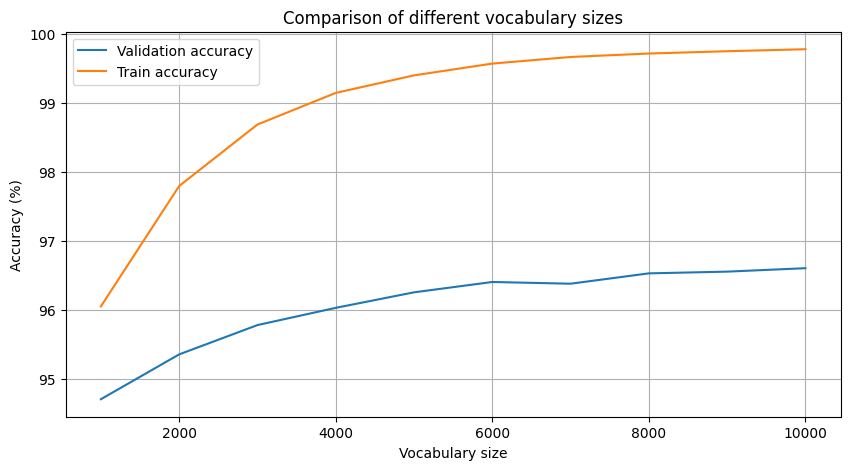

In [13]:
import pandas as pd

data = pd.read_csv('../data/logistic_diff_voc_size.csv')
data.plot(kind='line', x='Vocabulary size', y=['Validation accuracy', 'Train accuracy'], figsize=(10, 5), grid=True,
          title='Comparison of different vocabulary sizes', ylabel='Accuracy (%)')

# Logistic regression without most common words


In [13]:
import pvml
import build_vocabulary as bv
import features_extraction as fe

words_to_ignore = []
f = open('../data/stopwords.txt', 'r')
n = 0
for w in f.read().split():
    words_to_ignore.append(w)
    n += 1
f.close()

voc_no_common_words = [word for word in voc if word not in words_to_ignore]

voc = bv.get_vocabulary(path='../dataset/', numWords=8000, save=False)
X_train, Y_train = fe.get_bow_representation(voc_no_common_words)
X_valid, Y_valid = fe.get_bow_representation(voc_no_common_words, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)
w, b = pvml.logreg_train(
    X_train, Y_train, lambda_=0.00001, lr=0.003, steps=1000, init_w=None, init_b=0)

P = pvml.logreg_inference(X_train, w, b)
prediction = (P > 0.5)
accuracy_train = (prediction == Y_train).mean()

P = pvml.logreg_inference(X_valid, w, b)
prediction = (P > 0.5)
accuracy_validation = (prediction == Y_valid).mean()


print('Train accuracy: ', accuracy_train*100)
print('Validation accuracy: ', accuracy_validation*100)
print('Validation fpr: ', fpr*100)

Train accuracy:  99.3625
Validation accuracy:  94.525
Validation precision:  94.90670700958144


# Logistic regression with stemming


In [14]:
import pvml
import build_vocabulary as bv
import features_extraction as fe


voc = bv.get_vocabulary(path='../dataset/', numWords=8000, save=False)
X_train, Y_train = fe.get_bow_representation(voc, stemming=True)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=True)
w, b = pvml.logreg_train(
    X_train, Y_train, lambda_=0.00001, lr=0.003, steps=1000, init_w=None, init_b=0)

P = pvml.logreg_inference(X_train, w, b)
prediction = (P > 0.5)
accuracy_train = (prediction == Y_train).mean()

P = pvml.logreg_inference(X_valid, w, b)
prediction = (P > 0.5)
accuracy_validation = (prediction == Y_valid).mean()


print('Train accuracy: ', accuracy_train*100)
print('Validation accuracy: ', accuracy_validation*100)
print('Validation fpr: ', fpr*100)

Train accuracy:  98.40416666666667
Validation accuracy:  96.025
Validation precision:  96.00199900049975


# Find the optimal number of iterations


In [ ]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd

validation_accuracy = []
train_accuracy = []
iterations = []
voc = bv.get_vocabulary(path='../dataset/', numWords=8000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)
w = None
b = 0
for iteration in range(1, 101):
    w, b = pvml.logreg_train(
        X_train, Y_train, lambda_=0.00001, lr=0.003, steps=50, init_w=w, init_b=b)

    P = pvml.logreg_inference(X_train, w, b)
    prediction = (P > 0.5)
    accuracy_train = (prediction == Y_train).mean()

    P = pvml.logreg_inference(X_valid, w, b)
    prediction_valid = (P > 0.5)
    accuracy_validation = (prediction_valid == Y_valid).mean()

    print('Accuracy train: ', accuracy_train*100)
    print('Accuracy validation: ', accuracy_validation*100)

    validation_accuracy.append(accuracy_validation*100)
    train_accuracy.append(accuracy_train*100)
    iterations.append(iteration*50)

results = pd.DataFrame({'Iterations': iterations,
                       'Validation accuracy': validation_accuracy, 'Train accuracy': train_accuracy})
results.to_csv('../data/logistic_diff_iters.csv')

<Axes: title={'center': 'Train and test accuracy for different iterations'}, xlabel='Iterations', ylabel='Accuracy (%)'>

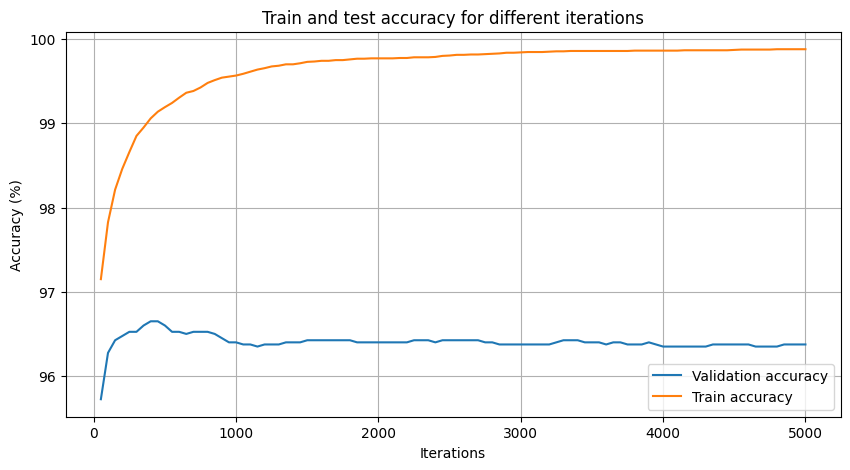

In [9]:
import pandas as pd

data=pd.read_csv('../data/logistic_diff_iters.csv')
data.plot(kind='line', x='Iterations', y=['Validation accuracy', 'Train accuracy'], figsize=(10, 5), grid=True,
           title='Train and test accuracy for different iterations', ylabel='Accuracy (%)')

# Best model in terms of AUC

In [15]:
import pvml
import build_vocabulary as bv
import features_extraction as fe


#--------------------------------------------------------------------------------------------
#----------------------MODEL WITH COMMON WORDS AND NO STEMMING-------------------------------
voc = bv.get_vocabulary(path='../dataset/', numWords=8000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)

w, b = pvml.logreg_train(
    X_train, Y_train, lambda_=0.00001, lr=0.003, steps=600, init_w=w, init_b=b)

P_lr = pvml.logreg_inference(X_valid, w, b)
prediction_lr = (P_lr > 0.5)

#--------------------------------------------------------------------------------------------
#----------------------MODEL WITHOUT COMMON WORDS AND NO STEMMING----------------------------
words_to_ignore = []
f = open('../data/stopwords.txt', 'r')
n = 0
for w in f.read().split():
    words_to_ignore.append(w)
    n += 1
f.close()

voc_no_common_words = [word for word in voc if word not in words_to_ignore]

X_train, Y_train = fe.get_bow_representation(voc_no_common_words)
X_valid, Y_valid = fe.get_bow_representation(voc_no_common_words, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)
w, b = pvml.logreg_train(
    X_train, Y_train, lambda_=0.00001, lr=0.003, steps=600, init_w=None, init_b=0)

P_no_common_words = pvml.logreg_inference(X_valid, w, b)
prediction_no_common_words = (P_no_common_words > 0.5)

#--------------------------------------------------------------------------------------------
#----------------------MODEL WITH COMMON WORDS AND STEMMING----------------------------------

X_train, Y_train = fe.get_bow_representation(voc, stemming=True)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=True)
w, b = pvml.logreg_train(
    X_train, Y_train, lambda_=0.00001, lr=0.003, steps=600, init_w=None, init_b=0)

P_stemming = pvml.logreg_inference(X_valid, w, b)
prediction_stemming = (P_stemming > 0.5)

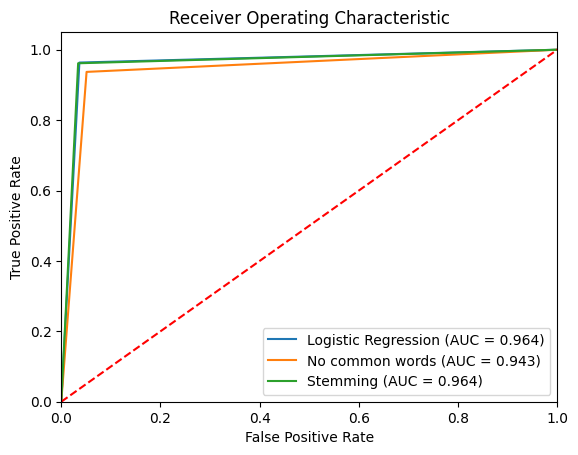

In [16]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, thresholds_gnb = roc_curve(Y_valid, prediction_lr)
auc_lr = roc_auc_score(Y_valid, prediction_lr)

fpr_no_common_words, tpr_no_common_words, thresholds_gnb = roc_curve(Y_valid, prediction_no_common_words)
auc_no_common_words = roc_auc_score(Y_valid, prediction_no_common_words)

fpr_stemming, tpr_stemming, thresholds_gnb = roc_curve(Y_valid, prediction_stemming)
auc_stemming = roc_auc_score(Y_valid, prediction_stemming)


plt.plot(fpr_lr, tpr_lr,label='Logistic Regression (AUC = {:.3f})'.format(auc_lr))
plt.plot(fpr_no_common_words, tpr_no_common_words,label='No common words (AUC = {:.3f})'.format(auc_no_common_words))
plt.plot(fpr_stemming, tpr_stemming,label='Stemming (AUC = {:.3f})'.format(auc_stemming))
# Diagonal line representing random classifier
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()